# Grundgerüst Leistungsausweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- "Verändrung der Wildtier Population auf der Welt seit 1970"
### 1.2 Fragestellung:
- "Wie hat sich die Wildtierpopulation in Afrika seit 1970 verändert, im Vergleich zu Asien und Pacific, Europa und Central Asien, Lateinamerika und Karibik und den Süsswasssergebieten?"   
### 1.3 Datenquelle(n):
Beispiele für mögliche Datenquellen:
- https://ourworldindata.org
- https://healthdata.gov/
- https://www.who.int/data/collections
- https://www.kaggle.com/datasets?tags=4202-Healthcare




### 1.4 Daten beschaffen und laden

In [ ]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [1]:
pip install pandas requests

Note: you may need to restart the kernel to use updated packages.


In [17]:
import requests

url = 'https://ourworldindata.org/grapher/global-living-planet-index.csv?v=1&csvType=full&useColumnShortNames=true'  
response = requests.get(url)

with open('global-living-planet-index.csv', 'wb') as file:
    file.write(response.content)

In [13]:
import pandas as pd
import requests

# Fetch the data.
df = pd.read_csv("https://ourworldindata.org/grapher/global-living-planet-index.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
metadata = requests.get("https://ourworldindata.org/grapher/global-living-planet-index.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

In [28]:
import pandas as pd

df = pd.read_csv('global-living-planet-index.csv')
print(df.head())

   Entity Code  Year   lpi_final    ci_high      ci_low
0  Africa  NaN  1970  100.000000  100.00000  100.000000
1  Africa  NaN  1971   94.004613  103.67786   86.478470
2  Africa  NaN  1972   89.996994  105.99841   77.636576
3  Africa  NaN  1973   89.674807  109.67456   74.525344
4  Africa  NaN  1974   85.613140  109.10656   67.872155


In [23]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Entity     357 non-null    object 
 1   Year       357 non-null    int64  
 2   lpi_final  357 non-null    float64
 3   ci_high    357 non-null    float64
 4   ci_low     357 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 14.1+ KB
None


In [24]:
print(df.describe())

              Year   lpi_final     ci_high      ci_low
count   357.000000  357.000000  357.000000  357.000000
mean   1995.000000   62.852547   80.038822   50.874899
std      14.740261   30.835893   32.728130   29.994732
min    1970.000000    5.377315    9.517395    2.832950
25%    1982.000000   37.214458   55.269647   23.687129
50%    1995.000000   63.837220   87.592334   48.693627
75%    2008.000000   89.896840  105.411270   76.082350
max    2020.000000  128.223780  147.943120  110.602660


In [25]:
print(df.isnull().sum())

Entity       0
Year         0
lpi_final    0
ci_high      0
ci_low       0
dtype: int64


In [22]:
df = df.drop(columns=['Code'])

In [27]:
df = df.fillna(0)

In [29]:
import matplotlib.pyplot as plt

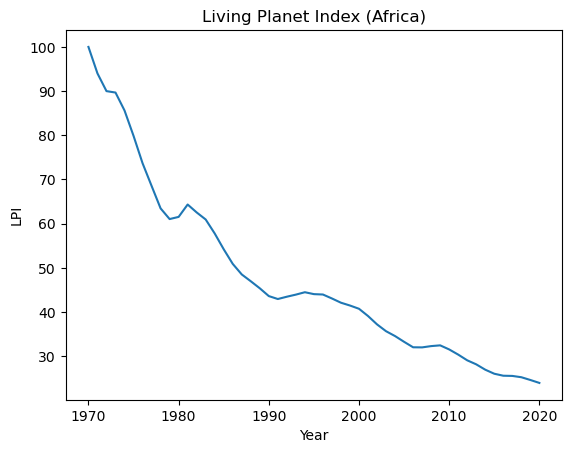

In [30]:
df_africa = df[df['Entity'] == 'Africa']
plt.plot(df_africa['Year'], df_africa['lpi_final'])
plt.title('Living Planet Index (Africa)')
plt.xlabel('Year')
plt.ylabel('LPI')
plt.show()

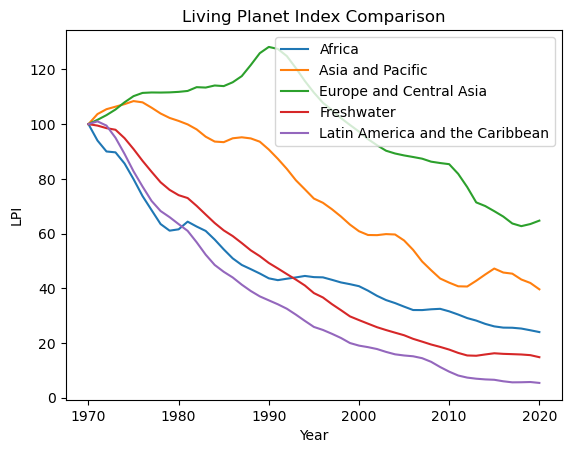

In [31]:
regions = df['Entity'].unique()[:5]
for region in regions:
    region_data = df[df['Entity'] == region]
    plt.plot(region_data['Year'], region_data['lpi_final'], label=region)

plt.title('Living Planet Index Comparison')
plt.xlabel('Year')
plt.ylabel('LPI')
plt.legend()
plt.show()

In [32]:
df.to_csv('cleaned_living_planet_index.csv', index=False)

## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).

